# Valhalla challenge con Scikit-Learn

**Autor:** Rodolfo Jesús Cruz Rebollar

**Matrícula:** A01368326

**Grupo:** 101

In [1]:
# Importar librería numpy para realizar operaciones matemáticas con arreglos

import numpy as np

# Importar librería pandas para manipulación y análsis de datos

import pandas as pd

# Importar matplotlib para realizar gráficos de los datos

import matplotlib.pyplot as plt

# Importar la función SGDRegressor del módulo linear_model de la librería Scikit-Learn
# para implementar regresión lineal con gradiente descendente estocástico

from sklearn.linear_model import SGDRegressor

# Además importar el método train_test_split para dividir el conjunto total de datos en
# subconjuntos para entrenamiento del modelo y prueba del mismo

from sklearn.model_selection import train_test_split

In [2]:
# Importar los datos de temperatura en celsius y Valks en un dataframe

temperatura = pd.read_csv("Valhalla23.csv")

# Verificar que los datos se hayan importado correctamente
# (imprimir primeros registros del dataframe)

temperatura.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


## Creación de subsets para entrenamiento y prueba

En cuanto a la creación de los subsets para el entrenamiento y prueba del modelo, se utilizará la función train_test_split() del módulo model_selection perteneciente a su vez a la librería de Scikit-Learn, por lo que éste método tiene la principal función de dividir el conjunto completo de datos en 4 subconjuntos de datos que devuelve como salida, los cuales son: valores de las variables predictoras correspondientes al conjunto de entrenamiento, valores de la variable objetivo que se desea predecir correspondientes de igual manera al conjunto de entrenamiento, valores de las variables predictoras correspondientes al conjunto de prueba y valores de la variable objetivo correspondientes al conjunto de prueba también, por lo que en resumen, en cuanto a nuestro caso particular, tendremos los siguientes subsets de datos como salida de la función train_test_split():

1. Datos en celsius del conjunto de entrenamiento (datos en celsius usados para entrenar el modelo)

2. Datos en Valks de conjunto de entrenamiento (datos en valks usados para entrenar el modelo)

3. Datos en celsius del conjunto de prueba (datos en celsius usados para poner a prueba el modelo)

4. Datos en Valks del conjunto de prueba (datos en Valks usados para poner a prueba el modelo)

Por lo cual, después de haber dividido el dataset principal en dichos subconjuntos, se procederá a agrupar los 4 subconjuntos de datos en 2 dataframes, el primero de ellos tendrá los valores en celsius y valks que se usarán para entrenamiento, mientras que el segundo dataframe, tendrá los datos en celsius y Valks empleados para probar el modelo.

**Nota:** la función train_test_split() primero reorganiza los datos originales de manera aleatoria para luego calcular la cantidad de datos que serán para entrenar y para prueba, éste cálculo lo realiza calculando los porcentajes especificados para entrenamiento y prueba de la cantidad de datos originales, por lo que una vez habiendo calculado dichos porcentajes, procede a tomar aleatoriamente dicha cantidad de datos tanto para el entrenamiento como para la prueba del modelo y así mismo, tras tomar la cantidad calculada de datos para entrenar y probar el modelo, divide los datos para entrenar y para probar en 2 subconjuntos, el primero de ellos que tendrá los datos de las variables predictoras, mientras que el segundo tendrá aquellos otros datos de la variable de respuesta que se desea predecir.

In [3]:
# Invocar al método train_test_split() para dividir el conjunto original de datos
# en los subconjuntos antes descritos

# La función train_test_split() recibe como argumentos los datos de la variable predictora (Celsius),
# datos de la variable respuesta (Valks), 30% de los datos originales para prueba y 70%
# de los datos originales para entrenamiento

# c_train: valores de celsius para entrenar, 
# c_test: valores de celsius para prueba, 
# v_train: valores de Valks para entrenar, 
# v_test: valores de Valks para prueba

c_train, c_test, v_train, v_test = train_test_split(temperatura["Celsius"], temperatura["Valks"], 
                                                   test_size = 0.3, train_size = 0.7)

### Subset para entrenamiento

In [4]:
# Agrupar los datos en celsius para entrenamiento y los datos de valks para entrenamiento
# en un solo dataframe

data_train = pd.DataFrame({"Celsius": c_train, "Valks": v_train})

# Mostrar los primeros registros del subset de entrenamiento

data_train.head()

,Celsius,Valks
15,-5.8114,66.370
0,61.4720,-139.740
13,28.5380,-30.998
50,7.6025,25.080
16,22.1760,-12.882


### Subset para prueba

In [5]:
# Agrupar los datos en celsius y Valks para prueba en un solo dataframe

# Pasar como argumento al constructor de dataframe un diccionario que contenga el nombre de cada columna y los datos
# asociados a dicha columna

data_test = pd.DataFrame({"Celsius": c_test, "Valks": v_test})

# Mostrar primeros registros del subset para prueba

data_test.head()

,Celsius,Valks
35,62.3460,-122.730
29,-2.8813,58.486
70,64.0720,-127.100
92,33.0800,-56.911
79,27.3290,-27.032


## Creación y entrenamiento del modelo

### Configuración del modelo y justificación de sus parámetros

En primera instancia, para configurar y entrenar el modelo de regresión lineal con gradiente estocástico, se utlizará el parámetro loss = "squared_error", mismo que indica que el modelo operará en base a la función de pérdida del error cuadrático, en otras palabras, misma que consiste básicamente en calcular la sumatoria de las diferencias de cuadrados entre los datos reales y las predicciones hechas por el modelo, lo cual se representa por medio de la siguiente expresión:

$error = \sum_{i = 1}^{n}{(y - \hat{y})^{2}}$ donde $\hat{y}$ representa las predicciones hechas por el modelo y $y$ a su vez representa los datos reales, por lo cual la función anterior será la función de costo J que se empleará para configurar el modelo de regresión lineal. 

Además de lo anterior, el parámetro penalty del modelo será "l2", mismo que se refiere al hecho de aplicar la regularización estándar a la función J con el principal objetivo de que el modelo logre aproximar los parámetros adecuados del modelo asegurando que éstos se encuentren lo más próximos a 0 posible, por lo cual, el objetivo de dicha regularización sobre J consiste en aplicar la penalización correspondiente a J principalmente en caso de que durante la ejecución del algoritmo, se estén obteniendo coeficientes con un valor bastante elevado y al aplicar dicha penalización, esos valores logren reducirse al mínimo posible, esto garantizará que el modelo entrenado, estime el modelo que mejor se ajuste a los datos en cuestión, asegurando que se obtenga el modelo que tenga el mayor grado de eficiencia posible y a su vez con los menores valores posibles para sus parámetros ($\theta_{0}$ y $\theta_{1}$). Por otro lado, también se agregó el parámetro alpha a la configuración del modelo con un valor de 0.05, el cual básicamente tiene la función de controlar la magnitud de la regularización aplicada a la función J al multiplicar la regularización por ese coeficiente (0.05), motivo por el cual, entre mayor sea el valor de dicho alpha, la regularización aplicada sobre J también será mayor y viceversa, por lo cual, en caso de que los parámetros comiencen a tener valores grandes, el algoritmo incrementará el valor del parámetro alpha para aplicar una regularización mayor sobre J y así reducir lo mayor posible el valor de los parámetros de la regresión, además, también se incluye el parámetro fit_intercept = True para configurar el algoritmo, mismo que tiene el propósito de indicar básicamente si los datos están centrados en su media, por lo que al asignar un valor True a dicho parámetro, se está indicando que los datos empleados para entrenar el modelo no se encuentran centrados, lo cual implicará que el algoritmo además de estimar el valor adecuado para la pendiente del modelo $\theta_{1}$, también deberá estimar el valor adecuado para el intercepto de dicho modelo ($\theta_{0}$), ya que los datos al no estar centrados, dicho intercepto deberá cumplir con la condición de ser distinto de 0 ($\theta_{0} \neq 0$). Adicionalmente, otro parámetro importante en la configuración y además para el entrenamiento del modelo es el parámetro max_iter que tiene asignado un valor de 410000, lo cual indica que el entrenamiento del algoritmo finalizará como máximo cuando se alcancen 410000 épocas de entrenamiento, donde las épocas se definen como las veces que el algoritmo recorre todo el subconjunto de datos de entrenamiento para actualizar los parámetros del modelo con tal de adecuarlos de una mejor manera a los patrones o tendencias de los datos utilizados, por lo que en caso de que el algoritmo no logre converger antes de 410000 iteraciones o épocas, el valor de 410000 en el parámetro max_iter servirá como un paro de emergencia para que el algoritmo no se quede iterando infinitamente y con ello, garantizar la obtención de alguna respuesta de parte del algoritmo dentro de la cantidad establecida de iteraciones para su entrenamiento. Por otra parte, el parámetro tol = 0.01 está asociado con el criterio de paro o de convergencia del algoritmo, en el sentido de que la convergencia del algoritmo ocurrirá cuando el valor de la función de costo J ya no sea inferior al valor de costo mínimo logrado hasta el momento por el algoritmo menos dicho nivel de tolerancia (tol), además de lo anterior, también se incluyó el parámetro learning_rate = "constant", mismo que establece que la tasa de aprendizaje del algoritmo sea constante a lo largo del entrenamiento del modelo, en base al hecho de que dicha tasa de aprendizaje denotada como $\alpha$, se mantendrá constante durante toda la etapa del entrenamiento del modelo con el objetivo principal de estudiar los efectos que tienen otros parámetros diferentes del algoritmo sobre el rendimiento del mismo que no sea la tasa de aprendizaje, además en cada iteración, el algoritmo calculará el valor para el costo J, por lo que en caso de que el algoritmo ya no logre disminuir en 0.01 unidades la pérdida J calculada durante un periodo mínimo de 10 iteraciones, se producirá lo que se conoce como una finalización temprana del entrenamiento del algoritmo, lo cual a su vez se encuentra directamente relacionado con el parámetro booleano early_stopping (se mencionará más adelante) cuyo valor es igual a True. Aparte de todos los parámetros descritos con anterioridad, otro parámetro importante para el entrenamiento del modelo es eta0 que prácticamente hace referencia al valor asignado inicialmente a la tasa de aprendizaje del algoritmo que a su vez significa la rapidez a la que éste mismo aprende los patrones implícitos entre los datos, por lo cual un valor de eta0 grande puede provocar que el algoritmo diverga y como consecuencia se obtengan predicciones muy alejadas de los datos reales, mientras que si dicho valor de eta0 es muy pequeño, se garantiza que el algoritmo eventualmente converga tras una cierta cantidad de iteraciones, por lo general muy alta ya que al aprender a un ritmo muy lento, el algoritmo ocupa muchas más iteraciones para lograr entrenarse adecuadamente. Adicionalmente, el parámetro early_stopping = True se refiere a que se detenga el entrenamiento del modelo en caso de que la puntuación obtenida al momento de que el algoritmo valida el modelo entrenado ya no mejore, por lo que en dicho caso, el algoritmo automáticamente procederá a generar un subconjunto de datos para validación del modelo a partir de los datos de entrenamiento del mismo, por lo cual, el entrenamiento del modelo se detendrá cuando el puntaje de la validación del mismo no mejore al menos por la cantidad de tolerancia establecida (tol) durante la cantidad de iteraciones establecida en el parámetro n_iter_no_change, por lo cual, finalmente, el parámetro n_iter_no_change hace alusión a la cantidad de iteraciones a esperar para detener el entrenamiento del modelo en caso de que durante dicho número de iteraciones, la puntuación de validación del modelo mencionada anteriormente ya no sea menor a la mejor pérdida J obtenida durante todo el proceso de entrenamiento del modelo, por lo que específicamente para el modelo a implementar, el entrenamiento finalizará en automático si durante 10 iteraciones, la puntuación de validación ya no resulte ser inferior a la pérdida óptima J hasta ese momento. 

**Nota 1:** no confundir alpha (controlador de la magnitud de la regularización) con $\alpha$ o eta0 (valor inicial de la tasa de aprendizaje).

**Nota 2:** el valor de 0.05 para el parámetro alpha se escogió debido a que el algoritmo no necesita un alto nivel de regularización para converger, esto porque al usar un valor para la tasa de aprendizaje $\alpha$ muy pequeño, prácticamente se consigue que se cumple el hecho de que la J mínima conseguida menos una cierta tolerancia (tol) no pueda continuar disminuyendo, por lo que se logra la convergencia del algoritmo, sin embargo se coloca el coeficiente alpha para regularización para que en caso de obtener valores de $\theta$ muy grandes sobretodo en las primeras iteraciones del algoritmo, se aplique la penalización a la función J y así lograr disminuir la magnitud de los coeficientes resultantes para no tener al final resultados que sean excesivamente grandes a tal punto que Python ya no pueda manejarlos y arroje como resultado valores inf o nan.

**Nota 3:** Se asignó el valor True al parámetro fit_intercept para que el algoritmo también estime el valor adecuado para el intercepto $\theta_{0}$ aparte de determinar el mejor valor para la pendiente $\theta_{1}$, dado que los datos con los que vamos a entrenar el modelo, no se encuentran centrados en su media.

**Nota 4:** Se eligió entrenar el modelo específicamente con 410000 iteraciones porque al ser una cantidad mayormente considerable de iteraciones, eleva las posibilidades de que el algoritmo finalmente converga, al permitir que los valores de costo J sean cada vez más bajos al punto de que eventualmente, se alcance el punto de convergencia del algoritmo, ya que se habrán permitido una mayor cantidad de actualizaciones para los parámetros $\theta$ hasta finalmente terminar de ajustarlos de forma adecuada a los datos usados para entrenar el modelo.

**Nota 5:** Se eligió una tolerancia (tol) de 0.01 porque al ser un valor mayormente bajo, es adecuado para definir el mínimo cambio que esperamos que ocurra en los valores de pérdida J para continuar con el entrenamiento del modelo, por lo que si dicho cambio esperado es inferior a 0.01, prácticamente se podrá concluir que el cambio sucedido es despreciable al ser un valor muy cercano a 0, por lo cual, podremos considerar que básicamente ya no hay cambio significativo en los valores de J, por lo que ya no tendrá sentido continuar entrenando el modelo y por consiguiente dicho entrenamiento habrá finalizado.

**Nota 6:** Se escogió un tipo de tasa de aprendizaje constante porque al tener un $\alpha$ constante pero considerando el resto de los parámetros para la configuración del algoritmo, es posible explorar otras alternativas de modelos para los datos usados, ya que al variar algunos otros parámetros del algoritmo, se puede explorar qué tan bien se ajustan otros modelos a los datos que tengan una diferente configuración y ver cómo impactan configuraciones diferentes en la calidad de las predicciones derivadas de los distintos modelos entrenados, lo cual amplia prácticamente el espacio de búsqueda de todos los posibles modelos que se pueden ajustar a los datos para finalmente también incrementar la probabilidad de encontrar un modelo en dicho espacio de búsqueda ampliado que se ajuste de la mejor manera posible a nuestros datos que no podríamos encontrar si durante la etapa de entrenamiento del modelo, no se probaran diferentes valores para los demás parámetros del algoritmo aparte de la tasa de aprendizaje. 

**Nota 7:** Se seleccionó un valor de 0.0001 para el parámetro eta0 (tasa de aprendizaje inicial), ya que al ser un valor mayormente pequeño, permitirá que el modelo durante su etapa de entrenamiento, aprenda a un ritmo mayormente lento, lo cual muy probablemente garantizará que el algoritmo no pase por alto el punto de convergencia que generalmente sucede cuando se asigna un valor inicial grande a la tasa de aprendizaje, por lo que eso también asegurará que el entrenamiento en general sea el adecuado para el modelo y que éste mismo al converger, aprenda los patrones que siguen los datos usados para su entrenamiento y sea capaz de generalizarlos para predecir de forma mayormente correcta las salidas para nuevos datos que el modelo aún no conozca.

**Nota 8:** Se elige un valor booleano True para el parámetro early_stopping para que finalice el entrenamiento del modelo en caso de que el puntaje de validación obtenido en su entrenamiento ya no sea inferior al valor mínimo de pérdida obtenido hasta el momento, por lo que si esto sucede durante 10 iteraciones de entrenamiento consecutivas, se asume que ya no hay una mayor mejoría posible para los parámetros del modelo, por lo que el entrenamiento del mismo termina en ese punto. 


In [87]:
# Crear el modelo de regresión lineal con gradiente descendente estocástico con los parámetros mostrados

regresion_lineal = SGDRegressor(loss = "squared_error", penalty = "l2", alpha = 0.05, fit_intercept = True, 
                                max_iter = 410000, tol = 0.01, learning_rate = "constant", eta0 = 0.0001, 
                                early_stopping = True, n_iter_no_change = 10) 

### Entrenamiento del modelo

In [88]:
# Entrenar el modelo de regresión lineal creado anteriormente

# El primer argumento de la función fit() son los valores de la variable predictora Celsius del
# subset de entrenamiento

# El segundo argumento de fit() son los valores de la variable objetivo Valks del subset de 
# entrenamiento

"""Nota: dado que el método fit() admite solamente arreglos de 2 dimensiones para el caso de la varible predictora, 
   se procede a convertir dicho arreglo 1D que contiene los valores de Celsius a un arreglo de numpy y posteriormente, 
   se reestructura dicho arreglo con el método reshape() para que sea un arreglo 2D, por lo que el nuevo arreglo 2D tiene
   filas que son en realidad otros arreglos con un solo elemento en ellos, además de que el nuevo arreglo 2D también tiene
   1 columna de datos, por lo cual, la nueva forma de los datos de celsius es (70, 1) en vez de (70,), por lo cual, el nuevo
   arreglo 2D ya puede ser aceptado por el método fit() para entrenar el modelo."""

regresion_lineal.fit(data_train["Celsius"].to_numpy().reshape(-1, 1), data_train["Valks"])

SGDRegressor(alpha=0.05, early_stopping=True, eta0=0.0001,
             learning_rate='constant', max_iter=410000, n_iter_no_change=10,
             tol=0.01)

## Prueba del modelo

### Cálculo de las predicciones de los datos de prueba

In [89]:
# Calcular la predicción en Valks para cada uno de los valores de celsius del subset de datos de prueba,
# por medio del método predict() del modelo entrenado

# Nota: los datos en celsius del subset de datos de prueba, se transforman en un arreglo de numpy 
# bidimensional para ser aceptado por el método predict() del modelo 

# Guardar las predicciones calculadas en la variable valks_predicted

valks_predicted = regresion_lineal.predict(data_test["Celsius"].to_numpy().reshape(-1, 1))

# Mostrar las primeras equivalencias en Valks de los datos en celsius del subset de datos de prueba

valks_predicted

array([-135.85359403,   29.35197158, -140.22515021,  -61.72962932,
        -47.16368519,  -65.80231897,  -75.52561223,   16.02328422,
         40.54680258, -106.1163744 ,   63.6651417 ,    8.10002861,
        -55.43823561,   42.57023029,    8.30594258, -158.62823665,
       -173.11819776, -159.2259697 ,   31.52381945, -137.72024346,
        -71.10593348,    2.17259354,  -99.44253285,  -65.88843306,
         34.8969588 ,   53.49861418, -163.84826983, -169.71922419,
        -87.45241295, -156.70586634])

### Gráfica de los datos reales vs las predicciones

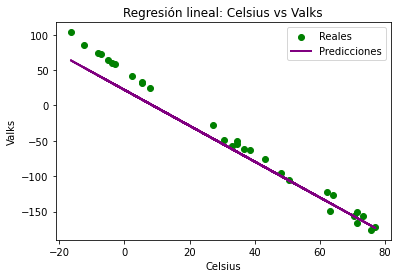

In [90]:
# Graficar en un mismo gráfico, los grados celsius vs valks verdaderos del subset de prueba

plt.scatter(data_test["Celsius"], data_test["Valks"], color = "green", label = "Reales")

# Graficar dentro del mismo gráfico, los grados celsius del subset de prueba vs las predicciones en Valks
# hechas por el modelo

# Función plot para trazar la tendencia de las predicciones con una recta que pase por los puntos 
# correspondientes a las mismas

plt.plot(data_test["Celsius"], valks_predicted, color = "purple", linewidth = 2, label = "Predicciones")

# Graficar grados celsius en el eje horizontal

plt.xlabel("Celsius") 

# Graficar Valks en el eje vertical

plt.ylabel("Valks") 

# Título del gráfico

plt.title("Regresión lineal: Celsius vs Valks") 

# Agregar leyenda al gráfico

plt.legend()

# Mostrar gráfico de datos reales vs predicciones del modelo

plt.show() 

In [91]:
# Mostrar ecuación del modelo calculado para el subconjunto de datos de prueba

print(f'Valks = {regresion_lineal.intercept_[0]} + {regresion_lineal.coef_[0]} * Celsius')

Valks = 22.054309465749657 + -2.5327671943532715 * Celsius


## Cálculo de métrica de error: error cuadrático medio

### Error cuadrático medio (MSE) para subconjunto de entrenamiento

In [92]:
# Importar la función mean_squared_error() del módulo metrics de la librería Scikit-Learn

from sklearn.metrics import mean_squared_error

# Utilizar el modelo entrenado para predecir los grados Valks a partir de los grados celsius
# del subconjunto de datos de entrenamiento

predictions_train = regresion_lineal.predict(data_train["Celsius"].to_numpy().reshape(-1, 1))

# Mostrar las predicciones realizadas

predictions_train

array([  36.77323274, -133.63995551,  -50.22580073,    2.79894687,
        -34.11233584,  -38.41297453,  -53.51333254,  -46.17590598,
          9.11592153,   69.69566039,   22.91664071, -169.80533827,
          7.48887188,  -40.14792006, -118.19260839,  -93.21192555,
        -99.1993872 ,  -26.63307431, -171.67452046,  -13.50320918,
         39.80748784,  -23.93061171,   48.10888559, -133.52851375,
       -115.50787516,  -51.33515276, -170.25617083, -170.30682618,
       -121.17874091,   32.78994977,   48.00504214, -167.95895099,
        -12.6749943 ,  -93.3081707 , -162.65027095,  -16.3576378 ,
       -103.27460961,    0.31328915, -152.93457599,    2.57150438,
        -71.3592102 , -142.35520742, -127.93869655,  -15.93213292,
       -170.37014536, -129.98263968, -124.63596813, -119.20824803,
        -75.52307946, -104.35103567,  -93.37402265,   63.98427037,
        -83.31893689,  -90.98562319, -106.95472035, -119.0714786 ,
         64.64785537,  -23.64947456,   11.03044025, -128.69599

A continuación, se procederá a calcular el valor del MSE (error cuadrático medio) para el subconjunto de datos de entrenamiento, para lo cual en base a las predicciones en Valks calculadas para cada valor en celsius del subset de entrenamiento, se calculará el valor del MSE mediante la sumatoria de los cuadrados de las diferencias entre los datos en valks reales del conjunto de entrenamiento y las predicciones igualmente en valks que el modelo calculó para cada datos en celsius del susbset de entrenamiento y multiplicando el resultado de dicha sumatoria por $\frac{1}{n}$, esto se representa matemáticamente por medio de la siguiente expresión:

$MSE = \frac{1}{n}\sum_{i = 1}^{n}{(y - \hat{y})^{2}}$

Donde n se refiere a la cantidad de observaciones del subconjunto de entrenamiento, $y$ hace referencia a los datos verdaderos en valks del subset de entrenamiento y $\hat{y}$ representa las predicciones en valks para cada dato en celsius del subconjunto de entrenamiento. 

In [93]:
# Calcular el valor del MSE para el subconjunto de datos de entrenamiento mediante la función mean_squared_error()

# data_train["Valks"] se refiere a los datos en valks reales del conjunto de entrenamiento

# predictions_train hace referencia a los valores en valks predichos por el modelo para los 
# datos del subset de entrenamiento

train_MSE = mean_squared_error(data_train["Valks"], predictions_train)

# Mostrar el valor del MSE para el subconjunto de datos de entrenamiento

print(f'MSE para subconjunto de datos de entrenamiento: {train_MSE}')

MSE para subconjunto de datos de entrenamiento: 386.13185469075336


### Error cuadrático medio (MSE) para subconjunto de prueba

In [94]:
# Calcular el valor del MSE para el subconjunto de datos de prueba mediante la función mean_squared_error()

# data_test["Valks"] se refiere a los datos en valks reales del conjunto de prueba

# valks_predicted se refiere a los datos en valks predichos por el modelo para cada dato en celsius del
# subconjunto de prueba

test_MSE = mean_squared_error(data_test["Valks"], valks_predicted)

# Mostrar el valor del MSE para el subconjunto de datos de prueba

print(f'MSE para subconjunto de datos de prueba: {test_MSE}')

MSE para subconjunto de datos de prueba: 382.4533753226244


### $R^{2}$ para el subconjunto de datos de prueba

A manera de complemento, se procederá a calcular el valor del coeficiente de determinación $R^{2}$ para evaluar modelos de regresión, por lo que en términos generales, el valor de dicho coeficiente hace referencia a la proporción o porcentaje de la variabilidad total de los datos que es explicada por el modelo de regresión calculado por el algoritmo, motivo por el cual, entre más cercano a 1 sea el valor del $R^{2}$, el modelo será capaz de explicar una mayor proporción de variabilidad de los datos, lo cual implicará que dicho modelo sea más confiable para predecir la equivalencia en Valks de una cierta cantidad de grados celsius, lo cual a su vez será benéfico para evitar realizar una configuración errónea de la máquina reguladora de temperatura descrita en el challenge 1 de Valhalla, además el coeficiente de determinación está dado por la expresión:

$R^{2} = 1 - \frac{\sum_{i = 1}^{n}{(y_{i} - \hat{y_{i}})^{2}}}{\sum_{i = 1}^{n}{(y_{i} - \bar{y})}}$

Donde a 1 se le resta el cociente de 2 sumatorias, la primera de ellas es la suma de los cuadrados de las diferencias entre los datos reales en Valks del subconjunto de prueba y los valores predichos en valks para cada dato en celsius del subset de prueba, mientras que la segunda sumatoria (la que está en el denominador) se refiere a la suma de las diferencias entre los datos en valks reales del subconjunto de prueba y la media de dichos datos en valks reales del subconjunto de datos de prueba también. 

* $y_{i}$ se refiere a los datos en valks reales del subconjunto de prueba.

* $n$ se refiere a la cantidad de datos (filas) del subconjunto de prueba.

* $\hat{y_{i}}$ representa los datos en valks predichos por el modelo para el subconjunto de prueba.

* $\bar{y}$ representa la media de los datos en valks reales del subset de prueba.

In [95]:
# Calcular el valor del coeficiente de determinación R2 para las predicciones del subset de prueba

# Importar la función r2_score() para calcular el coeficiente R^2 del modelo de regresión

from sklearn.metrics import r2_score

# Para obtener el R2, se comparan las predicciones de valks hechas por el modelo para el subset de prueba y 
# los valores verdaderos de valks del subset de prueba

R2 = r2_score(data_test["Valks"], valks_predicted)

# Mostrar valor del coeficiente de determinación R2

print(f'R2 = {R2}')

R2 = 0.9523710043326618


Por último, se observa que el valor del coeficiente de determinación $R^{2}$ es igual a 0.9523, lo cual significa que el modelo entrenado es capaz de explicar el 95.23% de la variabilidad total de los datos, lo cual al ser considerablemente superior al 70% u 80% de variabilidad explicada, es posible afirmar que el modelo es capaz de generalizar de forma bastante acertada los patrones y tendencias que siguen los datos analizados, por lo cual, solamente existe un 4.77% de margen de error en las predicciones del modelo de regresión lineal, evidenciando así que el desempeño del modelo en general es en su gran mayoría adecuada, además de que las predicciones de las equivalencias en valks de los grados celsius, derivadas del mismo también son altamente confiables, por lo que el modelo obtenido es una alternativa adecuada para resolver el problema del calentamiento global en la tierra planteado inicialmente en el challenge 1 de Valhalla. 